# CPSC 4300/6300-001 Applied Data Science (Fall 2020)

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Dane Acena"
COLLABORATORS = ""

# CPSC4300/6300-001 Problem Set #3


# Part B. Exploratory Data Analysis

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## 1. Histograms of Attributes

Finish the following code to plot a histograms of the numerical attributes of the housing data using 50 bins. Set the figure size to  $20×15$  and the layout to  $3×3$. You can use the method `pandas.DataFrame.hist` to plot the histograms of each series in a DataFrame. A sample figure is available at https://www.palmetto.clemson.edu/dsci/figures/ps03b_hist.jpg.

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpt
import seaborn as sns

housing = pd.read_csv("input/housing.csv")

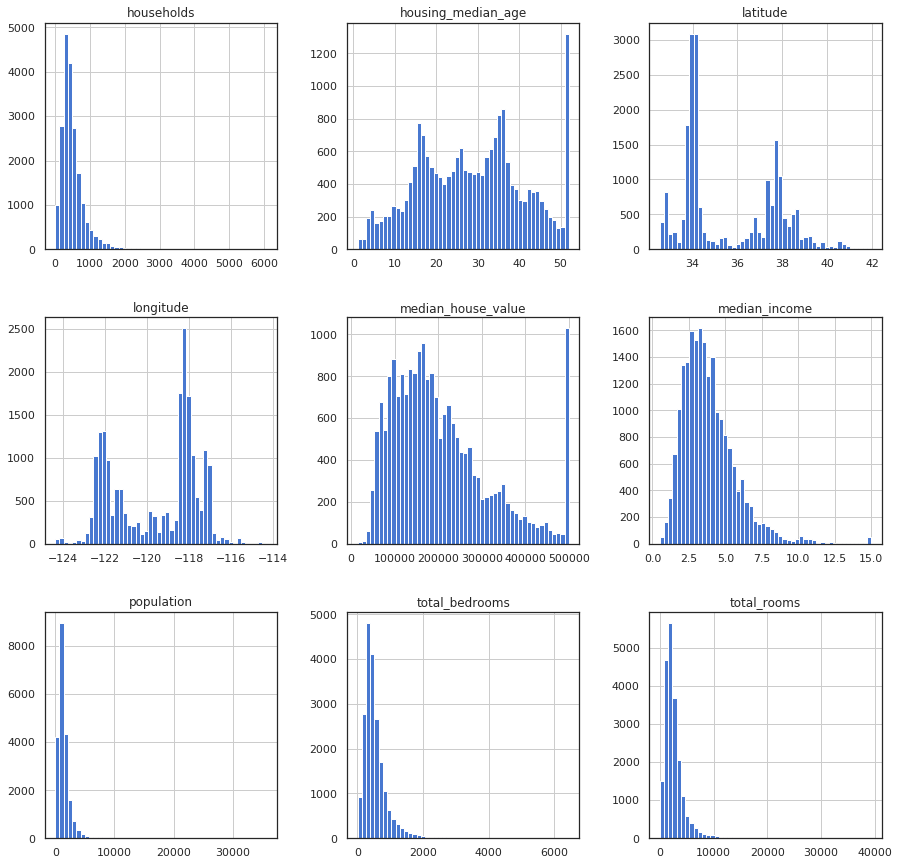

In [5]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")

_ = housing.hist(bins=50, figsize=(15,15))

# raise NotImplementedError()

## 2. Capped Attributes

Based on the above histogram plots, list the set of features whose values are capped along with either lower or upper caps. Present your answer as a dict type, e.g.: 
```
{
    "attribut_a": [10, 1000],
    "attribute_b": [5, 600]
}
```

In [6]:
capped_attributes = {
    "housing_median_age": [1,52],
    "median_income": [0.49, 15],
    "median_house_value": [14999,500001]
    
}

capped_attributes

{'housing_median_age': [1, 52],
 'median_income': [0.49, 15],
 'median_house_value': [14999, 500001]}

In [7]:
import hashlib
assert isinstance(capped_attributes, dict)
assert hashlib.md5(''.join(sorted(capped_attributes.keys())).encode()).hexdigest() == 'acf847493013597728fb3e833ab92c6c'

## 3. Transformed Attribute Values

The values of `median_income` do not seem to match the actual income distribution in the United States. In 1990, the median household income of California is \$59,790 (see https://nces.ed.gov/programs/digest/d10/tables/dt10_025.asp). Which all the following explanations which are likely to be true?

````
1. The median_income has been scaled.
2. The median_income has been cappep at 15 for the maximum value of median_income.
3. The median_income has been capped at 0.4999 for the minimum valeu of the media_income.
4. The number represents the actual median_income divided by 10,000, i.e., 5 means an actual income of $50,000.
5. The median_income data are corrupted.
```

__Present your answer as a list, for example, answer = [1, 5].__


In [8]:
answer = [1,4,3,2]
answer

[1, 4, 3, 2]

In [9]:
import hashlib
isinstance(answer, list)
assert hashlib.md5(''.join([str(a) for a in sorted(answer)]).encode()).hexdigest() == '81dc9bdb52d04dc20036dbd8313ed055'

True

## 4. Long Tail Distribution

List at least two attributes whose histograms are tail heavy: they extend much farther to the right than to the left. Save your list into a variable __long_tail_attributes__.

In [10]:
long_tail_attributes = ("Household", "population", "median_income", "total_bedrooms", "total_rooms" )

In [11]:
import hashlib
assert hashlib.md5(''.join(sorted(long_tail_attributes)).encode()).hexdigest().endswith('7cad5572')

## 5. Scatter Plots

Scatter matrix is a good visualization for  correlations between attributes. __Use the seaborn's pairplot() method to plot the scatter matrix of housing data__. A sample figure is shown at https://www.palmetto.clemson.edu/dsci/figures/ps03b_housing_pairplot.jpg.

Before you start, consider the following three hints:

1. pairplot only applies to numerical attributes. 
2. pairplot cannot directly handle the NaN value.
3. When the dataset is large, the plotting may be slow. 

You may preprocess the data going into the `pairplot()` method by dropping certain columns and rows. Also, since you only want to see an overall trend, it may be efficient to plot a fraction of the datasets. The methods you may need include:

+ pandas.DataFrame.sample
+ pandas.DataFrame.drop
+ pandas.DataFrame.dropna
+ seaborn.pairplot

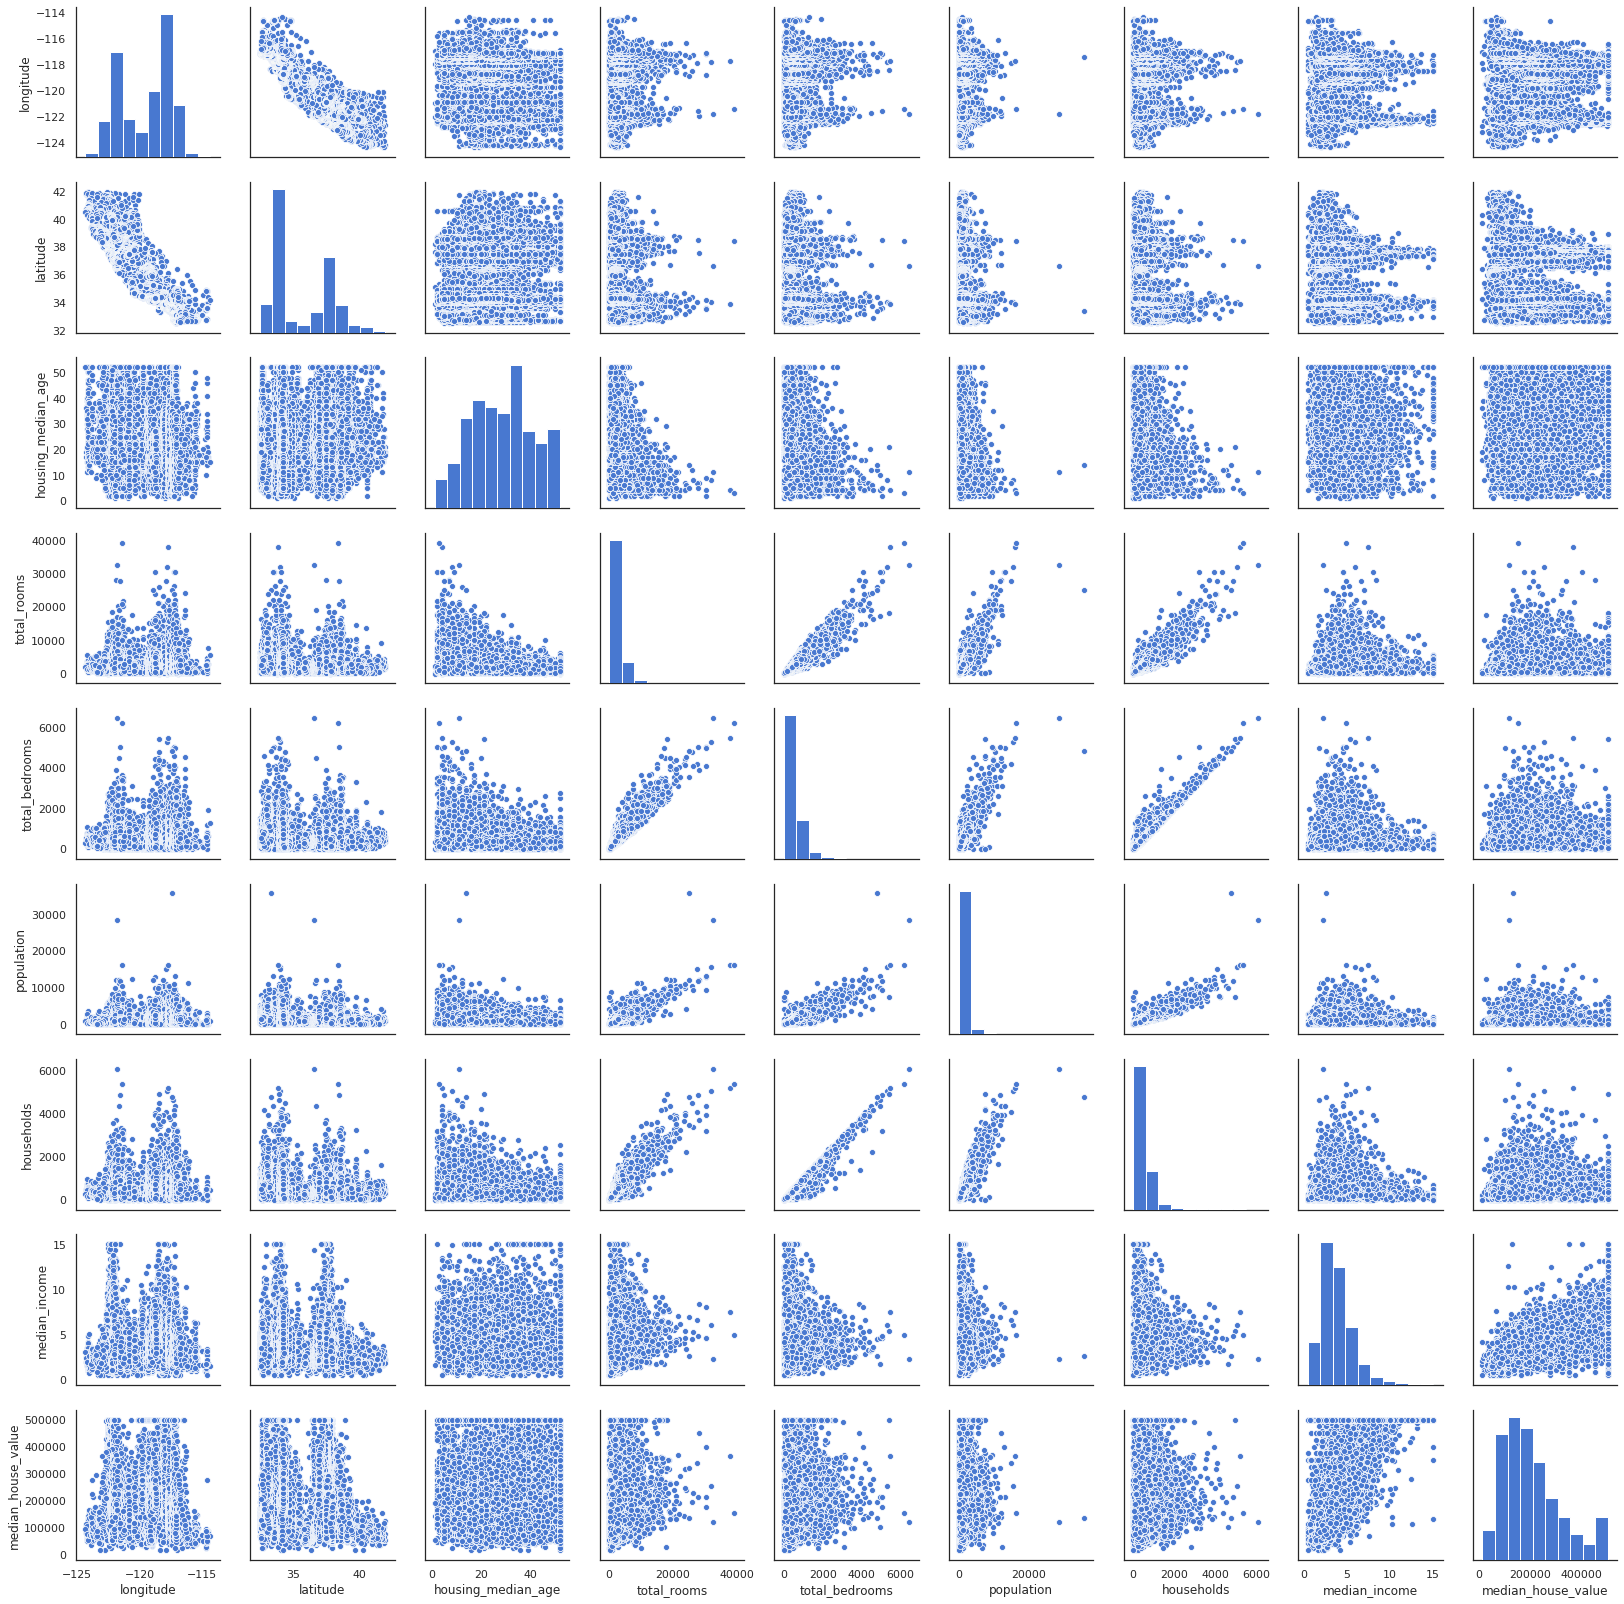

In [13]:
np.warnings.filterwarnings('ignore')
sns.pairplot(housing)
# raise NotImplementedError()

## 6. Correlation Matrix vs Scatter Matrix

__Question 6(a)__. Compute the correlation coefficients between each pair of the numerical attributes and save the results to a variable __corr_matrix__.

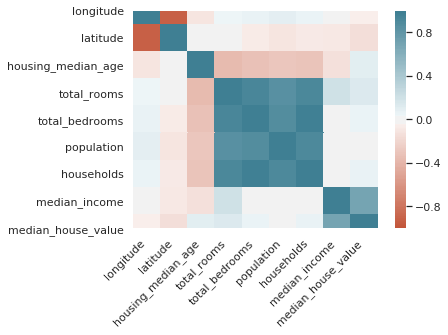

In [14]:
corr_matrix = housing.corr()
# raise NotImplementedError()
corr_matrix

ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

__Question 6(b)__. Print the top three attributes that have the strongest correlation with `median_house_value` and the corresponding correlation coefficients.

In [15]:
corr_matrix['median_house_value'].abs().sort_values(ascending=False).head(3)
# raise NotImplementedError()

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
Name: median_house_value, dtype: float64

__Question 6(c)__. Use `seaborn.scatterplot` Plot the scatter plot between __median_income__ and __median_house_value__ into a figure of size $10 \times 8$. Use __median_income__ as x-axis, __median_house_value__ as y_axis, and __ocean_proximity__ as __hue__. A sample figure is provided at https://www.palmetto.clemson.edu/dsci/figures/ps03b_income_vs_house_value.jpg.

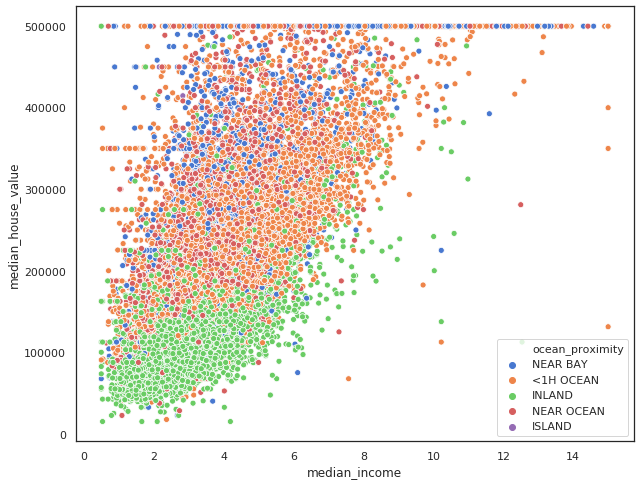

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
_ = sns.scatterplot(ax=ax, data=housing, x="median_income",y="median_house_value",hue="ocean_proximity")

# raise NotImplementedError()

## 7. Visualize Geographical Data

When a dataset contains geolocation information (latitude and longitude), creating a geographical scatterplot of the data can reveal useful information. 

__Question 7(a)__. Create a scatterplot using the __(latitude, longitude)__ as the coordinates, 1/50 of the population as the size of the marker, and the median house value as the color. You can use the "jet" colormap. A sample figure is available at: https://www.palmetto.clemson.edu/dsci/figures/ps03b_housing_locations.jpg.

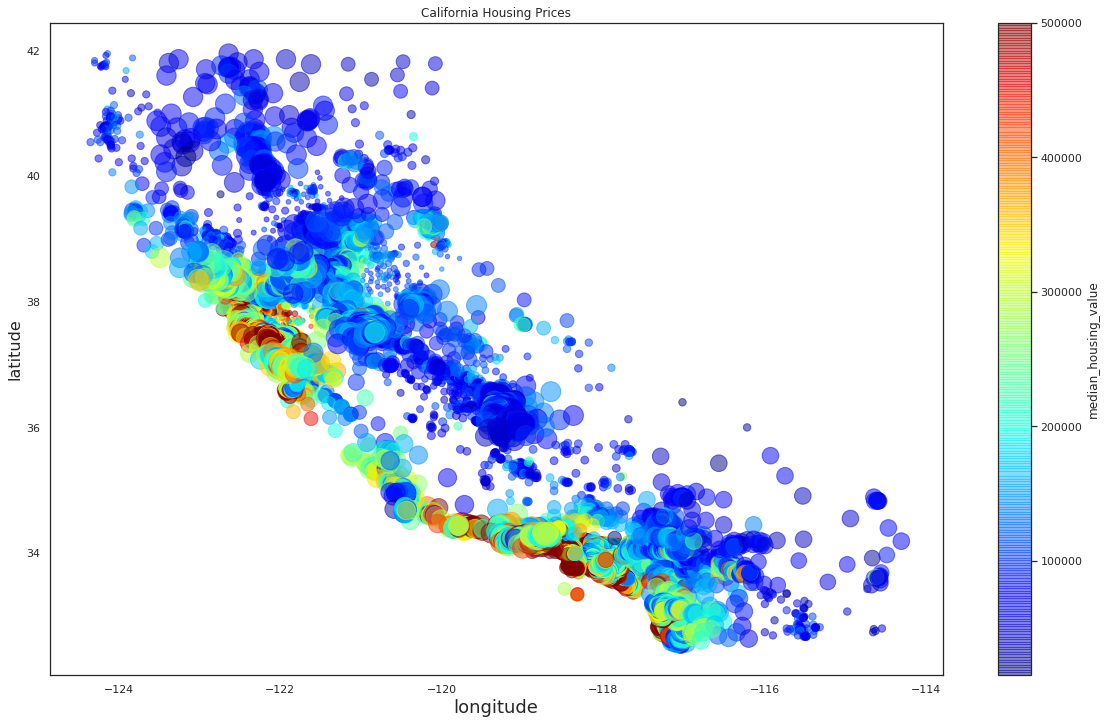

In [16]:
fig, ax = plt.subplots(figsize=(20,12))
s = [n/50 for n in range(len(housing['population']))]

_ = plt.scatter(housing["longitude"],housing["latitude"],c=housing['median_house_value'], s=s, cmap="jet",alpha=0.5)
_ = plt.colorbar().set_label("median_housing_value")

_ = plt.title("California Housing Prices")
_ = plt.xlabel('longitude', fontsize=18)
_ = plt.ylabel('latitude', fontsize=16)
raise NotImplementedError(

__Question 7(b)__. You can play a scatter plot on top of a basemap of the region. There are numerous ways to achieve such a task:

+ Load a map image and show the image on the same plot which contains the scatter plot.
+ Use certain map plot packages to plot the scatter plot on a map. For example, you can use the `gmplot` module (https://pypi.org/project/gmplot/) to plot data directly on a google map.

Read the following example that creates a scatter plot using `plotly` package. Then __create a scatter plot of the California housing data on a map using the plotly package__. A sample image of the plot is available at https://www.palmetto.clemson.edu/dsci/figures/ps03b_housing_map.png.

Hints:
+ You can extract the relevant columns of the `housing` DataFrame into a new DataFrame `df` and then change the corresponding arguments in the `px.scatter_mapbox` method.
+ You can set `zoom=5` to display all the entire map of the State of California.
+ To use cloud services such as Google Cloud and Mapbox, you need to create an account and use the API token to access the service. For this exercise, you can use the one I have provided along with the assignment. 

In [17]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.sequential.Jet, size_max=15, zoom=10)
fig.show()

In [18]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(housing, lat="latitude", lon="longitude",     color="median_house_value", size=s,
                  color_continuous_scale=px.colors.sequential.Jet, size_max=15, zoom=5)
fig.show()

__End of Part B__.